In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
from PIL import Image
import glob
from keras.datasets import mnist
from keras.layers import Dropout
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras import initializers
from keras import optimizers
from matplotlib import pyplot
import pandas as pd
from keras.datasets import cifar10
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import glob
from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import cv2


Bad key "text.kerning_factor" on line 4 in
C:\anaconda\anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


# Analysis of dataset

In [4]:
angry = glob.glob("train/angry/*")
disgust=glob.glob("train/disgust/*")
fear=glob.glob("train/fear/*")
happy=glob.glob("train/happy/*")
neutral=glob.glob("train/neutral/*")
sad=glob.glob("train/sad/*")
surprise=glob.glob("train/surprise/*")
#path for the images
angry_path=[]
angry_image=[]
angry_label=[]
for path in angry:
    pa=str(path.split("\\")[0])+"/"
    im=str(path.split("\\")[1])
    angry_path.append(pa)
    angry_image.append(im)
    angry_label.append(1)
disgust_path=[]
disgust_image=[]
disgust_label=[]
for path in disgust:
    pa=str(path.split("\\")[0])+"/"
    im=str(path.split("\\")[1])
    disgust_path.append(pa)
    disgust_image.append(im)
    disgust_label.append(2)
fear_path=[]
fear_image=[]
fear_label=[]
for path in fear:
    pa=str(path.split("\\")[0])+"/"
    im=str(path.split("\\")[1])
    fear_path.append(pa)
    fear_image.append(im)
    fear_label.append(3)
happy_path=[]
happy_image=[]
happy_label=[]
for path in happy:
    pa=str(path.split("\\")[0])+"/"
    im=str(path.split("\\")[1])
    happy_path.append(pa)
    happy_image.append(im)
    happy_label.append(4)
neutral_path=[]
neutral_image=[]
neutral_label=[]
for path in neutral:
    pa=str(path.split("\\")[0])+"/"
    im=str(path.split("\\")[1])
    neutral_path.append(pa)
    neutral_image.append(im)
    neutral_label.append(5)
sad_path=[]
sad_image=[]
sad_label=[]
for path in sad:
    pa=str(path.split("\\")[0])+"/"
    im=str(path.split("\\")[1])
    sad_path.append(pa)
    sad_image.append(im)
    sad_label.append(6)
surprise_path=[]
surprise_image=[]
surprise_label=[]
for path in surprise:
    pa=str(path.split("\\")[0])+"/"
    im=str(path.split("\\")[1])
    surprise_path.append(pa)
    surprise_image.append(im)
    surprise_label.append(7)


In [5]:
angryframe = pd.DataFrame()
angryframe["path"]=angry_path
angryframe["image"]=angry_image
angryframe["label"]=angry_label
print("total angry images label 1",angryframe.shape[0])
#angryframe.head(10)
disgustframe = pd.DataFrame()
disgustframe["path"]=disgust_path
disgustframe["image"]=disgust_image
disgustframe["label"]=disgust_label
print("total disgust images label 2",disgustframe.shape[0])
#disgustframe.head(10)
fearframe = pd.DataFrame()
fearframe["path"]=fear_path
fearframe["image"]=fear_image
fearframe["label"]=fear_label
print("total fear images label 3",fearframe.shape[0])
#fearframe.head(10)
happyframe = pd.DataFrame()
happyframe["path"]=happy_path
happyframe["image"]=happy_image
happyframe["label"]=happy_label
print("total happy images label 4",happyframe.shape[0])
#happyframe.head(10)
neutralframe = pd.DataFrame()
neutralframe["path"]=neutral_path
neutralframe["image"]=neutral_image
neutralframe["label"]=neutral_label
print("total neutral images 5",neutralframe.shape[0])
#neutralframe.head(10)
sadframe = pd.DataFrame()
sadframe["path"]=sad_path
sadframe["image"]=sad_image
sadframe["label"]=sad_label
print("total sad images label 6",sadframe.shape[0])
#sadframe.head(10)
surpriseframe = pd.DataFrame()
surpriseframe["path"]=surprise_path
surpriseframe["image"]=surprise_image
surpriseframe["label"]=surprise_label
print("total surprise images label 7",surpriseframe.shape[0])
#surpriseframe.head(10)
total_images=(surpriseframe.shape[0]+sadframe.shape[0]+neutralframe.shape[0]+happyframe.shape[0]+fearframe.shape[0]+disgustframe.shape[0]+angryframe.shape[0])
print("total images",total_images)
arr=[1,2,3,4,5,6,7]
counts=[surpriseframe.shape[0],sadframe.shape[0],neutralframe.shape[0],happyframe.shape[0],fearframe.shape[0],disgustframe.shape[0],angryframe.shape[0]]

total angry images label 1 3995
total disgust images label 2 436
total fear images label 3 4097
total happy images label 4 7215
total neutral images 5 4965
total sad images label 6 4830
total surprise images label 7 3171
total images 28709


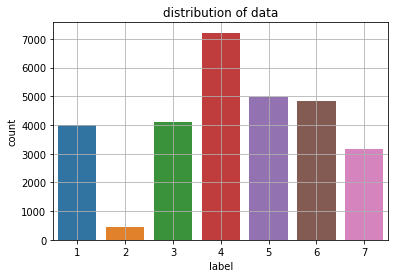

In [6]:
train_set=pd.concat([angryframe,disgustframe,fearframe,happyframe,neutralframe,sadframe,surpriseframe])
sns.countplot(x = "label", data = train_set)
plt.title("distribution of data")
plt.grid()
#plt.plot(arr,counts)

In [8]:
train_set=train_set.sample(frac=1).reset_index(drop=True)
train_set.reset_index(inplace = True, drop = True)
train_set.head()

,path,image,label
0,train/sad/,Training_14620372.jpg,6
1,train/surprise/,Training_95880970.jpg,7
2,train/fear/,Training_35338894.jpg,3
3,train/happy/,Training_36998645.jpg,4
4,train/surprise/,Training_52985506.jpg,7


EXAMPLE IMAGES FROM DATASET

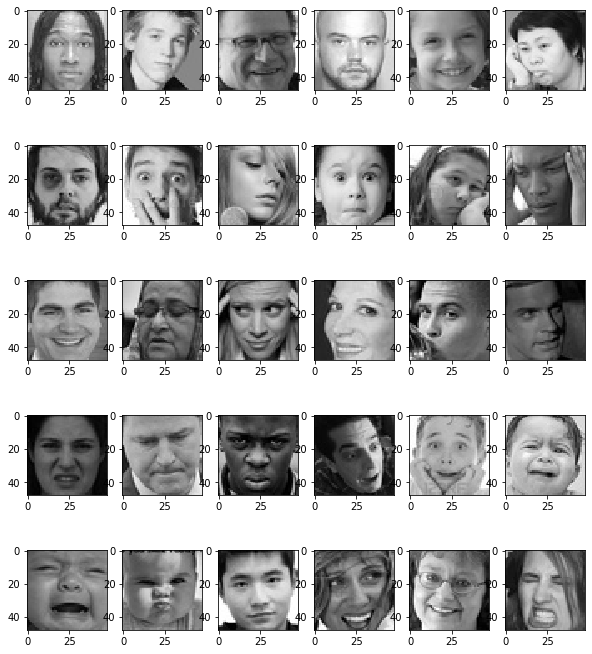

In [6]:
plt.figure(0, figsize=(10,12))
for i in range(1,31):
    plt.subplot(5,6,i)
    path=os.path.join(train_set['path'][i],train_set['image'][i])
    img=cv2.imread(path)
    plt.imshow(img)
    

In [9]:
input_size = cv2.imread(os.path.join(angryframe['path'][0],angryframe['image'][0]),0).shape[0]
batch_size = 64

In [10]:
# find face from an image
"""ref: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/
py_objdetect/py_face_detection/py_face_detection.html"""
# our training images don't need this they are already cropped, can be used later while testing
#checked-- works fine
def findface(path):
    image=cv2.imread(path)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cropped_image = gray[y:y+h, x:x+w]
        return cropped_image

In [11]:
"""ref=https://keras.io/preprocessing/image/"""
datagen_train = ImageDataGenerator(horizontal_flip=True)

X_train = datagen_train.flow_from_directory("train/",target_size=(input_size,input_size),color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True) #shuffling for generalization

datagen_validation = ImageDataGenerator(horizontal_flip=True)
X_valid = datagen_validation.flow_from_directory("test/",target_size=(input_size,input_size),color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False) #no need to shuffle testing

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
total_test=X_valid.n
total_test
X_train.n

28709

In [13]:
"""model is built using experimental results and ref :https://keras.io/examples/mnist_cnn/
Since the data set is more complex than MNIST we have added two new conv2D layers with 512 filters"""

model = Sequential()
model.add(Conv2D(128,(3,3), padding='same', input_shape=(input_size, input_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


In [14]:
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [15]:
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


In [16]:
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


In [17]:
model.add(Flatten())


In [18]:
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.load_weights("model_weights_new.h5")
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

In [ ]:
check_point = ModelCheckpoint("model_weights_new.h5", monitor='val_accuracy',save_weights_only=True, mode='max', verbose=1)
adapt_rate= ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=4, min_lr=0.00005, mode='auto')
callbacks = [PlotLossesCallback(), check_point, adapt_rate]

steps_involved_train=int(total_images/batch_size)
steps_involved_test=int(total_test/batch_size)

history = model.fit(
    x=X_train,
    steps_per_epoch=steps_involved_train,
    epochs=20,
    validation_data = X_valid,
    validation_steps = steps_involved_test,
    callbacks=callbacks
)

In [27]:
path=os.path.join(sad_path[4],sad_image[4])
path="../../my/im14.jpg"

this is a Happy  Image


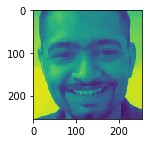

In [28]:
plt.figure(0, figsize=(2,2))
imf=findface(path)
plt.imshow(imf)
imf=cv2.resize(imf,(48,48))
imf=imf.reshape(1,48,48,1)
imf.shape
labels=["Angry", "Disgust","Fear", "Happy","Neutral", "Sad","Surprise"]
print("this is a",labels[model.predict(imf).argmax()]," Image")


this is a Angry  Image


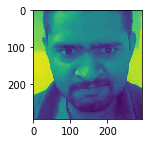

In [32]:
plt.figure(0, figsize=(2,2))
path="../../my/im5.jpg"
imf=findface(path)
plt.imshow(imf)
imf=cv2.resize(imf,(48,48))
imf=imf.reshape(1,48,48,1)
imf.shape
labels=["Angry", "Disgust","Fear", "Happy","Neutral", "Sad","Surprise"]
print("this is a",labels[model.predict(imf).argmax()]," Image")

this is a Surprise  Image


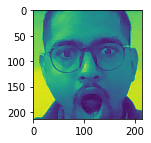

In [23]:
plt.figure(0, figsize=(2,2))
path="../../my/im12.jpg"
imf=findface(path)
plt.imshow(imf)
imf=cv2.resize(imf,(48,48))
imf=imf.reshape(1,48,48,1)
imf.shape
labels=["Angry", "Disgust","Fear", "Happy","Neutral", "Sad","Surprise"]
print("this is a",labels[model.predict(imf).argmax()]," Image")

this is a Sad  Image


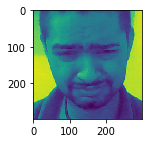

In [24]:
plt.figure(0, figsize=(2,2))
path="../../my/im2.jpg"
imf=findface(path)
plt.imshow(imf)
imf=cv2.resize(imf,(48,48))
imf=imf.reshape(1,48,48,1)
imf.shape
labels=["Angry", "Disgust","Fear", "Happy","Neutral", "Sad","Surprise"]
print("this is a",labels[model.predict(imf).argmax()]," Image")

this is a Disgust  Image


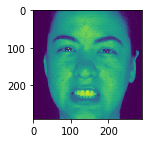

In [25]:
plt.figure(0, figsize=(2,2))
path="../../my/im36.jpg"
imf=findface(path)
plt.imshow(imf)
imf=cv2.resize(imf,(48,48))
imf=imf.reshape(1,48,48,1)
imf.shape
labels=["Angry", "Disgust","Fear", "Happy","Neutral", "Sad","Surprise"]
print("this is a",labels[model.predict(imf).argmax()]," Image")

this is a Angry  Image


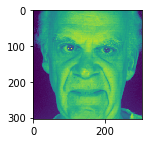

In [34]:
plt.figure(0, figsize=(2,2))
path="../../my/im287.jpg"
imf=findface(path)
plt.imshow(imf)
imf=cv2.resize(imf,(48,48))
imf=imf.reshape(1,48,48,1)
imf.shape
labels=["Angry", "Disgust","Fear", "Happy","Neutral", "Sad","Surprise"]
print("this is a",labels[model.predict(imf).argmax()]," Image")

### Live Prediction from video
source : https://www.geeksforgeeks.org/python-play-a-video-using-opencv/ https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/

In [29]:
def prediction(path):
    imf=findface(path)
    if imf is not None:
        imf=cv2.resize(imf,(48,48))
        imf=imf.reshape(1,48,48,1)
        imf.shape
        
        return str(labels[model.predict(imf).argmax()]);
    else:
        return "No face detection";

In [30]:
def Live_prediction_on_video():

    # Create a VideoCapture object and read from input file 
    cap = cv2.VideoCapture('facial_exp.mkv') 

    # Check if camera opened successfully 
    if (cap.isOpened()== False): 
        print("Error opening video file") 
    path ="video_frame.jpg"
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 

    # frame point 
    org = (95, 30) 

    # fontScale 
    fontScale = 1

    # Blue color in BGR 
    color = (255, 0, 0) 
    text = "None"
    # Line thickness of 2 px 
    thickness = 2
    # Read until video is completed 
    while(cap.isOpened()): 

        # Capture frame-by-frame 
        ret, frame = cap.read() 
        # Using cv2.putText() method 
        cv2.putText(frame, "Current Prediction "+ str(text), org, font, fontScale, color, thickness, cv2.LINE_AA)
        if ret == True: 
            # Display the resulting frame 
            cv2.imshow('Frame', frame) 

            cv2.imwrite(path, frame);
            text = prediction(path);
            #print(text)
            # Press space on keyboard to Pause 
            if cv2.waitKey(1) & 0xFF == ord(' '):
                # Press t on keyboard to resume 
                while(cv2.waitKey(1) & 0xFF != ord('t')):
                    time.sleep(1);
                    
            # Press Q on keyboard to exit 
            if cv2.waitKey(25) & 0xFF == ord('q'): 
                break

        # Break the loop 
        else: 
            break;

    # When everything done, release 
    # the video capture object 
    cap.release() 

    # Closes all the frames 
    cv2.destroyAllWindows() 


In [34]:
Live_prediction_on_video()

KeyboardInterrupt: 

In [35]:
 cv2.destroyAllWindows()

### Live Prediction from Webcam
source : 
https://medium.com/datadriveninvestor/real-time-facial-expression-recognition-f860dacfeb6a
https://docs.opencv.org/2.4/modules/highgui/doc/user_interface.html?highlight=waitkey

In [31]:
def detect_face_in_rectangle_form(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)

In [32]:
def Live_prediction_on_webcam(text):
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cap = cv2.VideoCapture(0)
    while(True):
        ret, img = cap.read()
        cv2.putText(img, "Last Emotion was "+str(text), (95,30), font, 1.0, (255, 0, 0), 2, cv2.LINE_AA)

        cv2.putText(img, "Press SPACE: FOR EMOTION", (5,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)

        cv2.putText(img, "Hold Q: To Quit", (460,470), font, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
        
        if ret ==True:
            # face detection 
            detect_face_in_rectangle_form(img);

            cv2.imshow("Image", img)
            if cv2.waitKey(1) == ord(' '):
                path = "webcam_frame.jpg"
                cv2.imwrite(path, img)
                text = prediction(path)
            
        if cv2.waitKey(25) == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break
        

In [33]:
Live_prediction_on_webcam("None")

In [34]:
 cv2.destroyAllWindows()